In [8]:
# Importing Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# EDA

In [9]:
#Import Dataset
from google.colab import files
uploaded=files.upload()

Saving Drug.csv to Drug (1).csv


In [10]:
df=pd.read_csv('Drug.csv')

In [11]:
df.head(10)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
6,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
7,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...
9,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437 Reviews,3.26,3.23,2.42,\r\n\t\t\t\t\tAmoxicillin/clavulanic acid is a...


In [12]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


In [13]:
df.describe(include = object)

,Condition,Drug,Indication,Type,Reviews,Information
count,2219,2219,2219,2219,2219,2219
unique,37,470,3,4,241,421
top,fever,Acetaminophen,On Label,RX,1 Reviews,\r\n\t\t\t\t\t This is a brand name drug and a...
freq,308,114,1723,1401,563,116


In [14]:
df.dtypes

Condition        object
Drug             object
Indication       object
Type             object
Reviews          object
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.1+ KB


In [16]:
#Removing information column
df = df[['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective','EaseOfUse', 'Satisfaction']]

In [17]:
# Changing the datatype of Reviews column
df['Reviews'] = df['Reviews'].str.replace('Reviews','')
df['Reviews'] = df['Reviews'].astype(float)

In [18]:
df.dtypes

Condition        object
Drug             object
Indication       object
Type             object
Reviews         float64
Effective       float64
EaseOfUse       float64
Satisfaction    float64
dtype: object

In [19]:
#Checking duplicates

In [20]:
df.duplicated()

0       False
1        True
2       False
3       False
4        True
        ...  
2214    False
2215    False
2216    False
2217    False
2218    False
Length: 2219, dtype: bool

In [21]:
df.duplicated().sum()

469

In [22]:
df[df.duplicated()]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
6,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
7,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
...,...,...,...,...,...,...,...,...
2187,vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,5.00,5.00,5.00
2188,vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,4.00,5.00,3.00
2189,vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,3.00,4.00,4.00
2193,vulvovaginal candidiasis,Fluconazole,On Label,RX,225.0,3.32,4.41,2.97


In [23]:
df[df.duplicated(keep =False)]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
5,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
...,...,...,...,...,...,...,...,...
2189,vertigo,Diphenhydramine Hcl,On Label,OTC,1.0,3.00,4.00,4.00
2192,vulvovaginal candidiasis,Fluconazole,On Label,RX,225.0,3.32,4.41,2.97
2193,vulvovaginal candidiasis,Fluconazole,On Label,RX,225.0,3.32,4.41,2.97
2194,vulvovaginal candidiasis,Fluconazole,On Label,RX,168.0,3.88,4.42,3.47


In [24]:
#Drop duplicated records

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68
...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2.0,5.00,5.00,5.00
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1.0,5.00,5.00,5.00
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1.0,5.00,4.00,5.00
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1.0,5.00,5.00,5.00


In [27]:
# Outlier Detection

In [28]:
df.describe()

,Reviews,Effective,EaseOfUse,Satisfaction
count,1750.000000,1750.000000,1750.000000,1750.000000
mean,64.615429,3.537829,3.938000,3.176611
std,227.444073,1.120956,1.043956,1.224443
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.500000,2.340000
50%,6.000000,3.690000,4.080000,3.105000
75%,30.750000,4.330000,4.800000,4.000000
max,4647.000000,5.000000,5.000000,5.000000


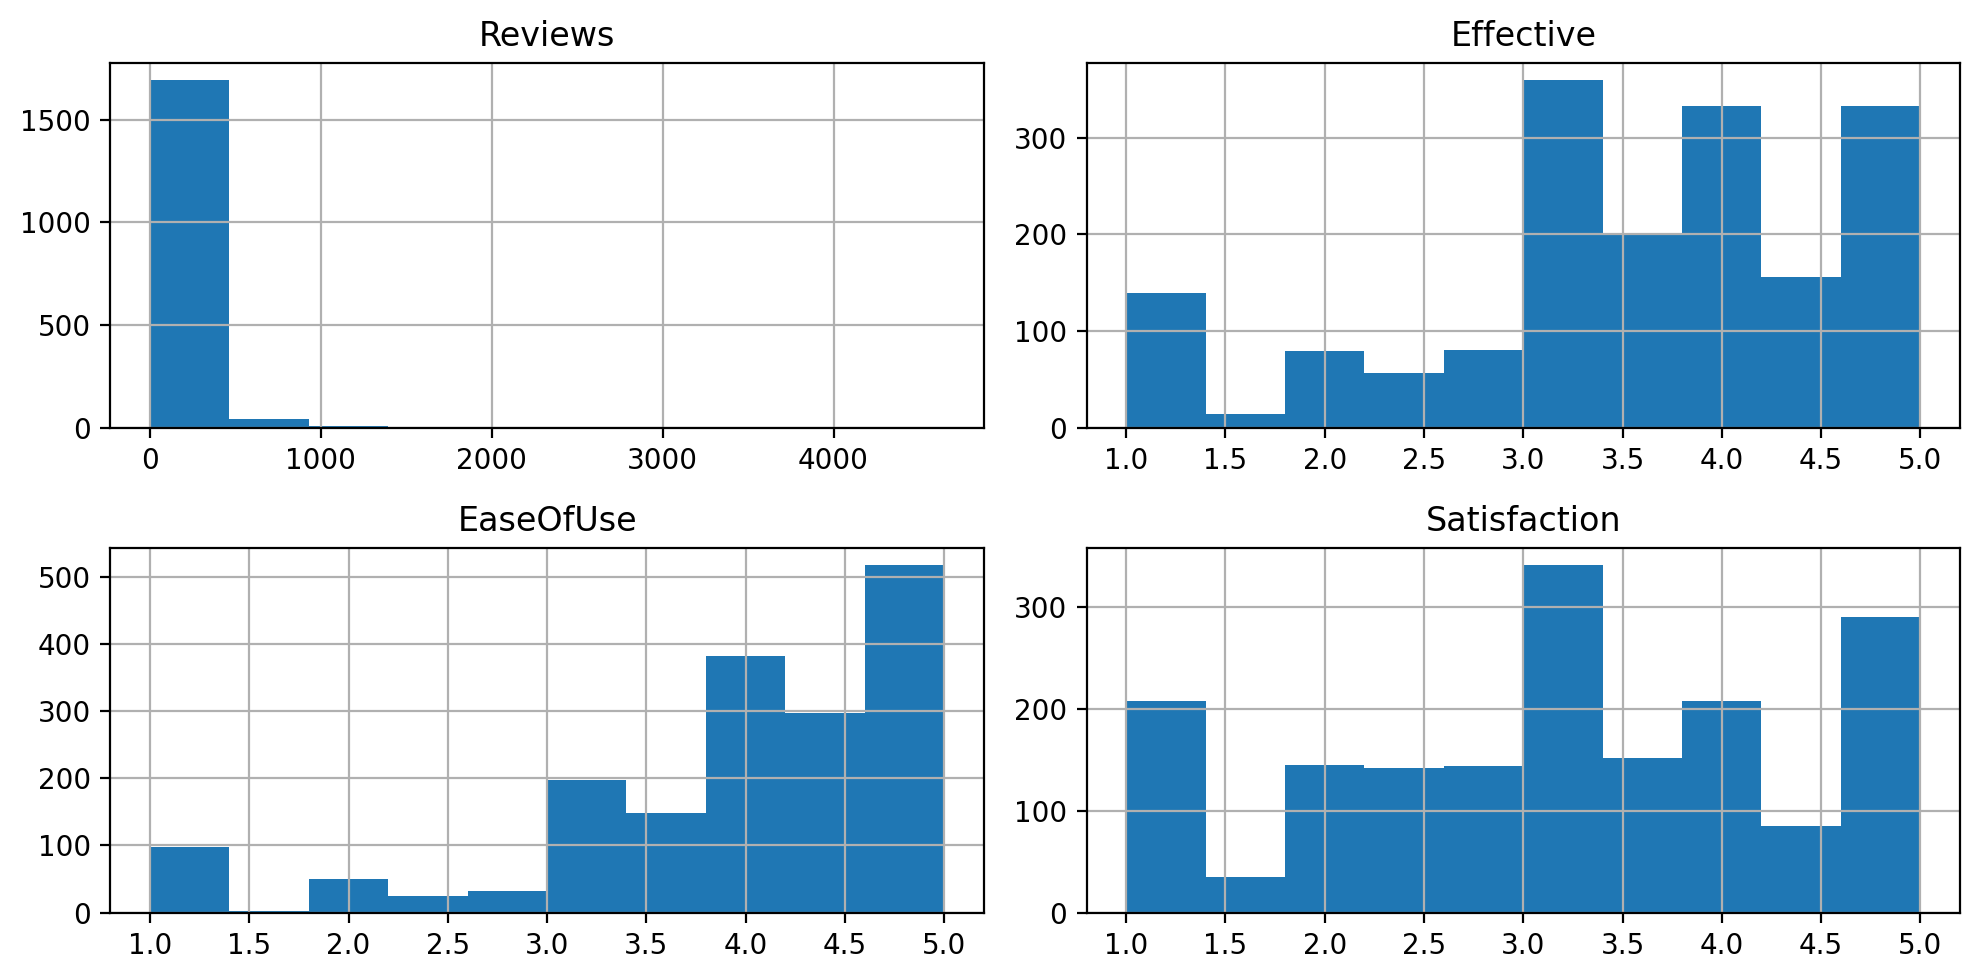

In [29]:
df.hist()
plt.tight_layout()

In [30]:
# Function for outlier detection
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)

    return lower,upper

In [31]:
outlier_detection(df,'Reviews')

(-41.125, 73.875)

In [32]:
df[df['Reviews']>73.875]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755.0,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584.0,3.21,4.01,2.57
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437.0,3.26,3.23,2.42
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361.0,2.44,2.96,1.68
...,...,...,...,...,...,...,...,...
2191,vulvovaginal candidiasis,Miconazole Nitrate,On Label,OTC,263.0,2.91,3.32,2.43
2192,vulvovaginal candidiasis,Fluconazole,On Label,RX,225.0,3.32,4.41,2.97
2194,vulvovaginal candidiasis,Fluconazole,On Label,RX,168.0,3.88,4.42,3.47
2196,vulvovaginal candidiasis,Miconazole Nitrate,On Label,OTC,123.0,2.86,3.05,2.53


In [33]:
df.loc[df['Reviews'] > 73.875 ,'Reviews']

0       994.0
2       755.0
3       584.0
8       437.0
11      361.0
        ...  
2191    263.0
2192    225.0
2194    168.0
2196    123.0
2197     97.0
Name: Reviews, Length: 279, dtype: float64

In [34]:
# Capping Outliers

In [35]:
df.loc[df['Reviews'] > 73.875 ,'Reviews'] = 73.875

<Axes: ylabel='Reviews'>

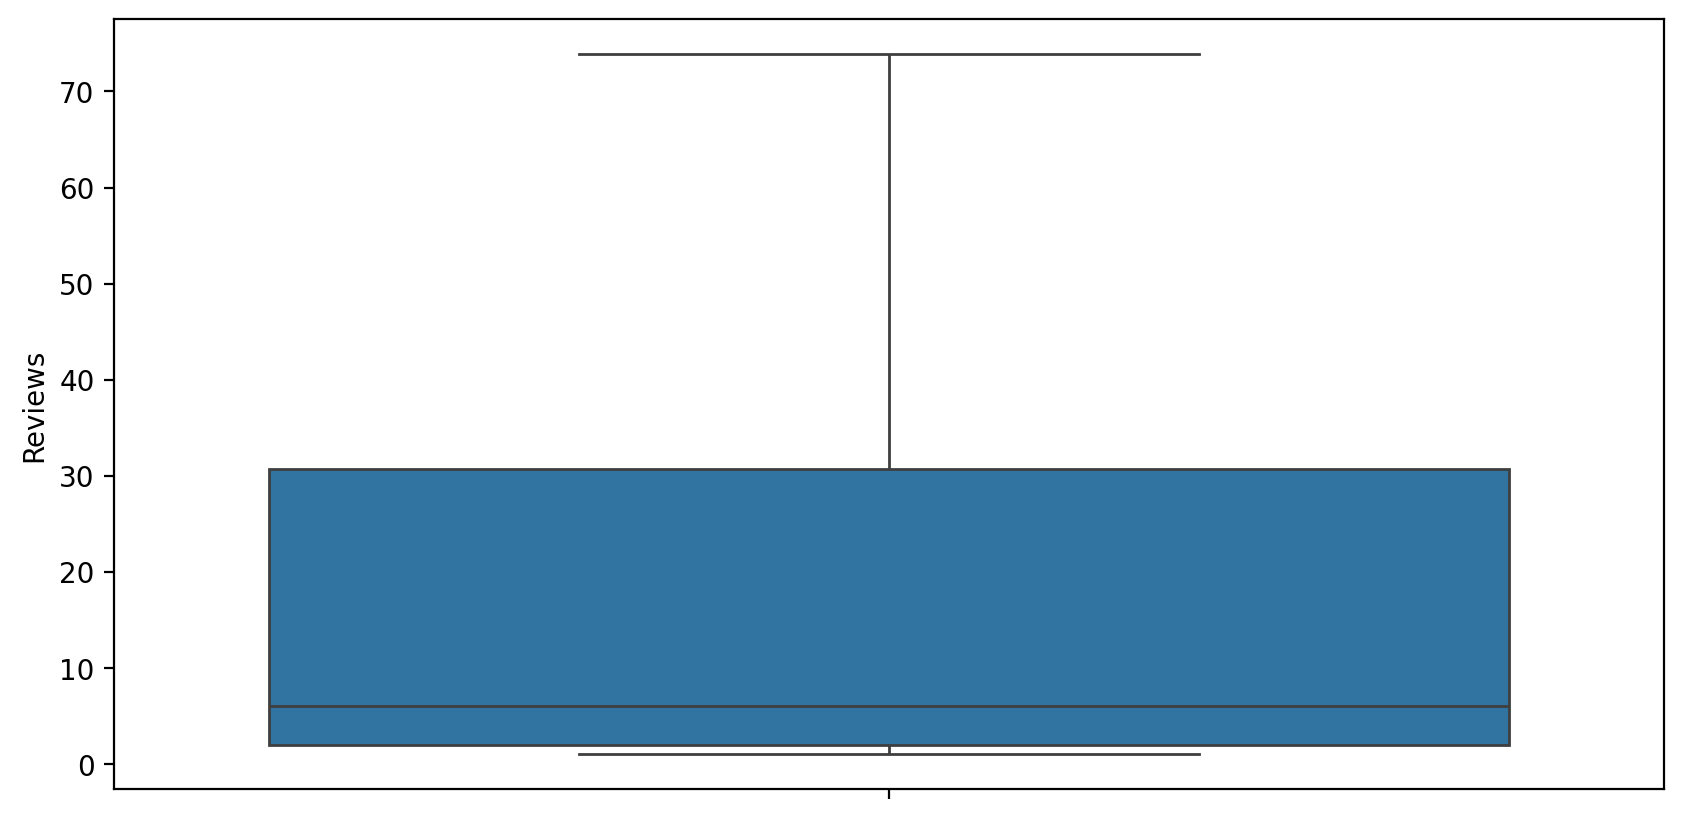

In [36]:
sns.boxplot(df['Reviews'])

In [37]:
outlier_detection(df,'Effective')

(1.005, 6.325)

In [38]:
df[df['Effective']>6.325]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction


In [39]:
outlier_detection(df,'EaseOfUse')

(1.5500000000000003, 6.75)

In [40]:
df[df['EaseOfUse']>6.75]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction


In [41]:
outlier_detection(df,'Satisfaction')

(-0.15000000000000036, 6.49)

In [42]:
df[df['Satisfaction']>6.49]

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction


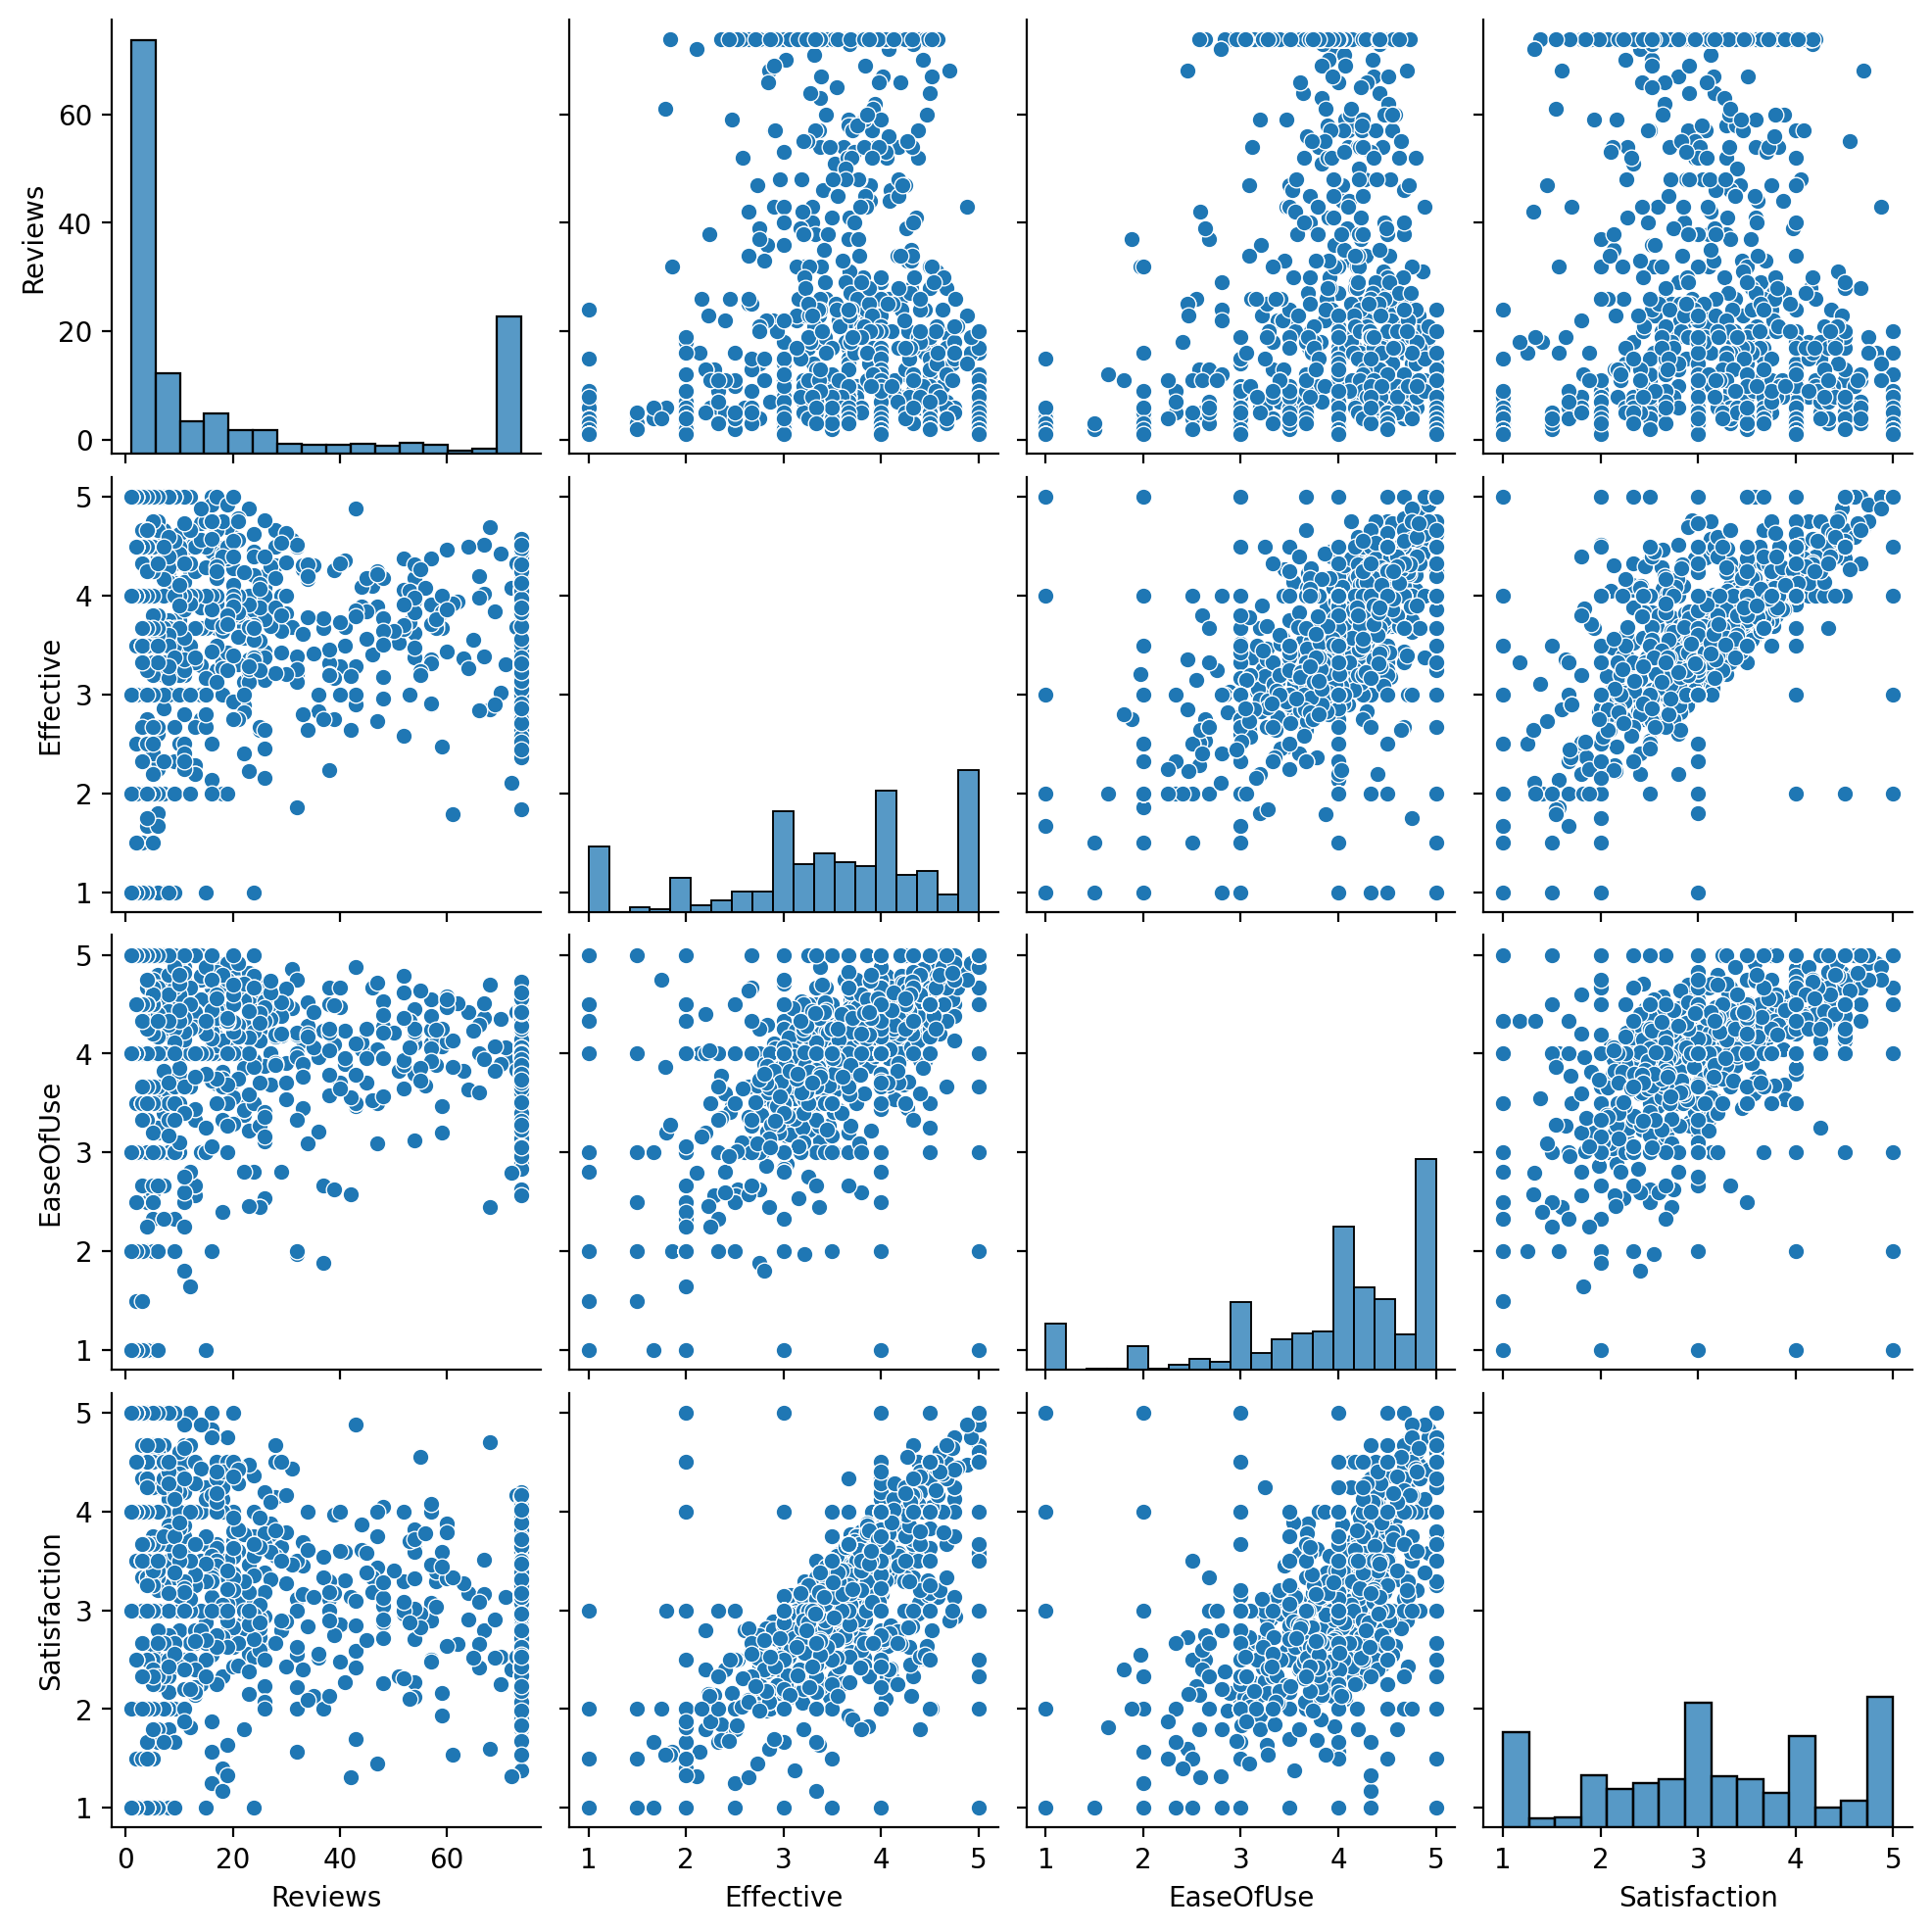

In [43]:
# Scatterplot and Correlation
sns.pairplot(df)

In [44]:
df.corr()

,Reviews,Effective,EaseOfUse,Satisfaction
Reviews,1.000000,-0.009334,0.003794,-0.125901
Effective,-0.009334,1.000000,0.611004,0.816539
EaseOfUse,0.003794,0.611004,1.000000,0.606262
Satisfaction,-0.125901,0.816539,0.606262,1.000000


<Axes: >

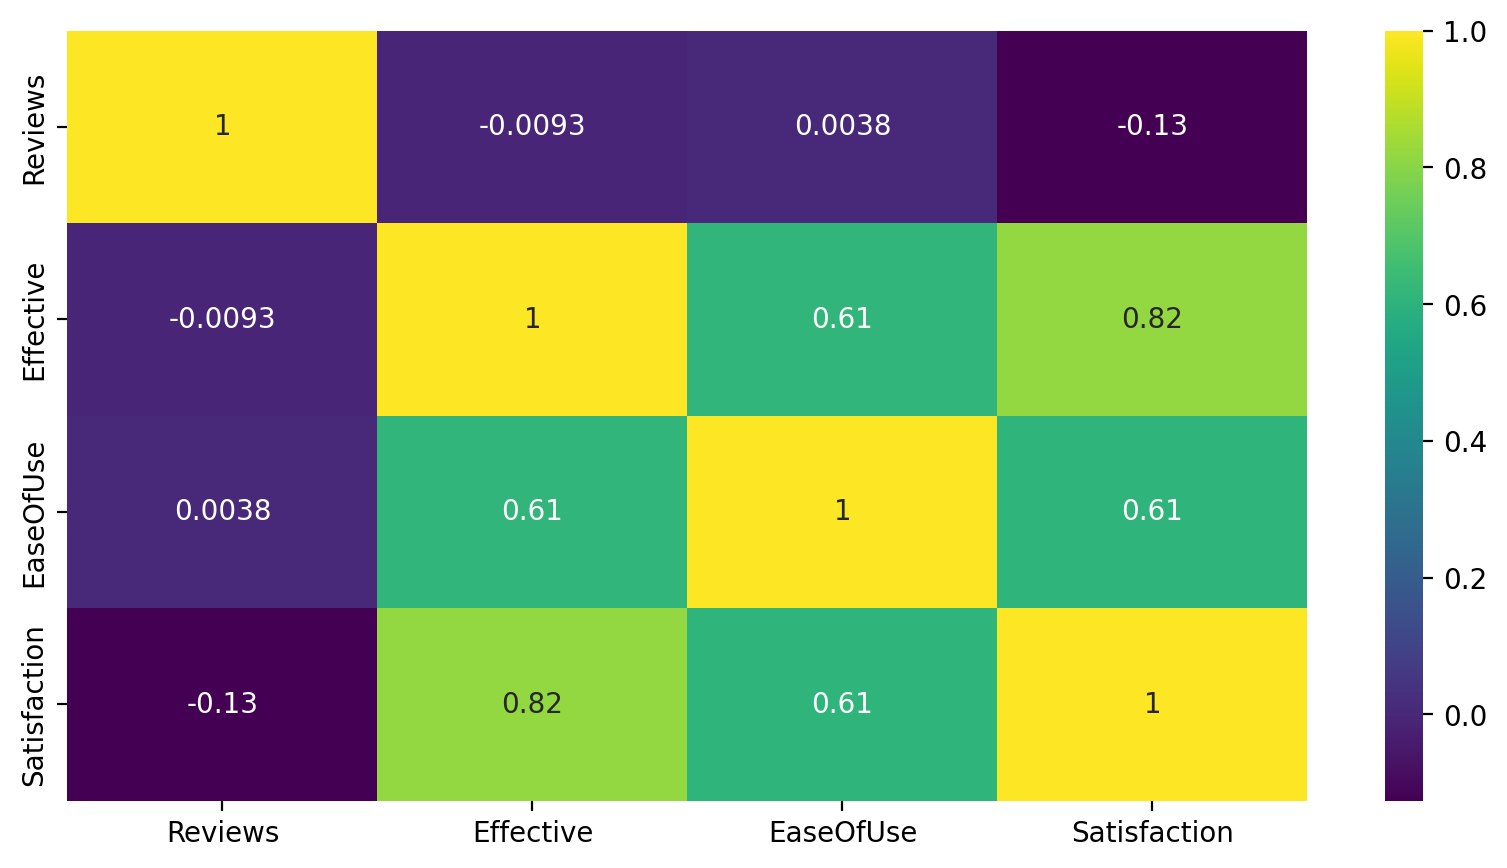

In [45]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')

# Transformation

In [46]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,73.875,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,73.875,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,73.875,3.21,4.01,2.57
8,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,73.875,3.26,3.23,2.42
11,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,73.875,2.44,2.96,1.68


In [47]:
!pip install category_encoders
import category_encoders as ce

# Create a CatBoostEncoder object
encoder = ce.CatBoostEncoder(cols=['Condition', 'Drug', 'Indication', 'Type'])

# Encode the categorical columns
df = encoder.fit_transform(df, df['Satisfaction'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [48]:
df.head(10)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,3.176611,3.176611,3.176611,3.176611,73.875,2.52,3.01,1.84
2,2.508306,3.176611,2.508306,2.508306,73.875,2.78,3.00,2.08
3,2.365537,3.176611,2.365537,2.365537,73.875,3.21,4.01,2.57
8,2.416653,3.176611,2.416653,2.416653,73.875,3.26,3.23,2.42
11,2.417322,2.508306,2.417322,2.417322,73.875,2.44,2.96,1.68
13,2.294435,3.176611,2.294435,2.294435,73.875,3.04,3.37,2.34
17,2.300944,3.176611,2.300944,2.300944,73.875,3.00,3.40,2.18
20,2.285826,2.798306,2.285826,2.285826,73.875,2.74,3.04,2.12
24,2.267401,3.176611,2.267401,2.267401,72.000,2.11,2.79,1.32
26,2.172661,2.572204,3.176611,2.172661,43.000,3.29,3.47,2.59


# Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [50]:
sc = StandardScaler()

In [51]:
sc.fit_transform(df)

array([[ 0.1111973 ,  0.01695037,  0.19231737, ..., -0.90826018,
        -0.88918062, -1.09191997],
       [-1.52746729,  0.01695037, -3.01266151, ..., -0.67624896,
        -0.89876231, -0.89585641],
       [-1.87753133,  0.01695037, -3.69733358, ..., -0.2925381 ,
         0.06898815, -0.49555998],
       ...,
       [-0.82826702,  1.51831288,  0.28926256, ...,  1.3047699 ,
         0.05940646,  1.48958354],
       [-0.62017641,  2.20295693,  0.29574004, ...,  1.3047699 ,
         1.01757524,  1.48958354],
       [-0.42749993, -0.19478384,  0.30220783, ..., -2.26463345,
         0.05940646, -1.77814242]])

In [52]:
scaled_Data = pd.DataFrame(sc.fit_transform(df) , columns = df.columns)

In [53]:
scaled_Data

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0.111197,0.016950,0.192317,0.031886,1.955599,-0.908260,-0.889181,-1.091920
1,-1.527467,0.016950,-3.012662,-3.188671,1.955599,-0.676249,-0.898762,-0.895856
2,-1.877531,0.016950,-3.697334,-3.876671,1.955599,-0.292538,0.068988,-0.495560
3,-1.752197,0.016950,-3.452199,-3.630345,1.955599,-0.247921,-0.678383,-0.618100
4,-1.750556,-1.585473,-3.448989,-3.627119,1.955599,-0.979648,-0.937089,-1.222629
...,...,...,...,...,...,...,...,...
1745,-1.298733,0.944183,0.276278,1.302630,-0.698136,1.304770,1.017575,1.489584
1746,-1.053699,0.016950,0.282775,-0.580956,-0.735058,1.304770,1.017575,1.489584
1747,-0.828267,1.518313,0.289263,1.316447,-0.735058,1.304770,0.059406,1.489584
1748,-0.620176,2.202957,0.295740,1.330212,-0.735058,1.304770,1.017575,1.489584


In [54]:
scaled_Data.describe()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03
mean,8.282898e-16,2.760966e-16,-1.088145e-15,1.055663e-16,-4.060244e-17,9.744586e-17,-1.624098e-16,1.299278e-16
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00
min,-2.350457e+00,-3.897262e+00,-4.622305e+00,-4.806138e+00,-7.350578e-01,-2.264633e+00,-2.815100e+00,-1.778142e+00
25%,-8.116828e-01,-4.676630e-01,-3.203599e-01,-5.793728e-01,-6.981362e-01,-4.799318e-01,-4.196779e-01,-6.834542e-01
50%,7.389893e-02,1.695037e-02,3.064379e-01,-4.409370e-01,-5.504501e-01,1.357903e-01,1.360600e-01,-5.850163e-02
75%,8.201595e-01,4.661282e-01,5.371509e-01,1.004765e+00,3.633581e-01,7.068948e-01,8.259415e-01,6.726521e-01
max,2.851374e+00,3.298764e+00,3.668094e+00,2.845351e+00,1.955599e+00,1.304770e+00,1.017575e+00,1.489584e+00


In [55]:
mn = MinMaxScaler()

In [56]:
mn.fit_transform(df)

array([[0.47322847, 0.54394082, 0.58074671, ..., 0.38      , 0.5025    ,
        0.21      ],
       [0.15821159, 0.54394082, 0.1941575 , ..., 0.445     , 0.5       ,
        0.27      ],
       [0.09091527, 0.54394082, 0.11157136, ..., 0.5525    , 0.7525    ,
        0.3925    ],
       ...,
       [0.29262585, 0.75257854, 0.59244038, ..., 1.        , 0.75      ,
        1.        ],
       [0.33262919, 0.8477205 , 0.59322171, ..., 1.        , 1.        ,
        1.        ],
       [0.36966932, 0.51451706, 0.59400186, ..., 0.        , 0.75      ,
        0.        ]])

In [57]:
mn_scaled = pd.DataFrame(mn.fit_transform(df) , columns = df.columns)

In [58]:
mn_scaled

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,0.473228,0.543941,0.580747,0.632298,1.000000,0.3800,0.5025,0.2100
1,0.158212,0.543941,0.194158,0.211392,1.000000,0.4450,0.5000,0.2700
2,0.090915,0.543941,0.111571,0.121475,1.000000,0.5525,0.7525,0.3925
3,0.115010,0.543941,0.141140,0.153669,1.000000,0.5650,0.5575,0.3550
4,0.115325,0.321259,0.141527,0.154090,1.000000,0.3600,0.4900,0.1700
...,...,...,...,...,...,...,...,...
1745,0.202184,0.672794,0.590874,0.798376,0.013722,1.0000,1.0000,1.0000
1746,0.249289,0.543941,0.591658,0.552204,0.000000,1.0000,1.0000,1.0000
1747,0.292626,0.752579,0.592440,0.800182,0.000000,1.0000,0.7500,1.0000
1748,0.332629,0.847721,0.593222,0.801981,0.000000,1.0000,1.0000,1.0000


In [59]:
mn_scaled.describe()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,0.451852,0.541585,0.557549,0.628131,0.273189,0.634457,0.734500,0.544153
std,0.192295,0.139005,0.120656,0.130731,0.371763,0.280239,0.260989,0.306111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.295814,0.476596,0.518907,0.552411,0.013722,0.500000,0.625000,0.335000
50%,0.466058,0.543941,0.594512,0.570503,0.068611,0.672500,0.770000,0.526250
75%,0.609519,0.606361,0.622341,0.759447,0.408233,0.832500,0.950000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating Report

In [62]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.7 MB/s eta 0:00:00


In [63]:
#Importing Sweetviz
import sweetviz as sv

In [64]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [65]:
report.show_html('drug.html')

Report drug.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Splitting Data into Train and Test

In [66]:
x=df.iloc[:,: -1]
y=df.iloc[:,-1]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [69]:
x_train_scaled

array([[ 0.83345739, -1.88137416,  0.92014625, ..., -0.72748671,
         0.41865682, -1.83461879],
       [-1.049478  ,  0.01047816,  0.57611426, ...,  0.91848337,
         0.02517396,  0.30986815],
       [-1.62160443, -1.63091732,  0.27378206, ..., -0.61526148,
        -1.36990165, -1.59634247],
       ...,
       [ 0.75406973, -0.06259018,  0.19300646, ..., -0.72748671,
         0.41865682, -1.83461879],
       [ 0.06075935,  1.40247326,  0.52299266, ..., -0.54044466,
         0.12354468, -0.24293293],
       [ 0.08303159,  0.21587307, -1.12268654, ...,  1.99865124,
         0.88368203,  0.68157922]])

In [70]:
x_test_scaled

array([[-1.54629792, -1.26382335,  0.67535149, ...,  1.80154273,
        -0.37324572, -0.18681559],
       [ 0.71218429,  0.81162555,  0.21656384, ..., -0.76665972,
         1.27286879,  0.99024033],
       [ 0.60163359,  0.5697633 ,  1.01160822, ..., -0.76665972,
        -0.49714681,  0.99024033],
       ...,
       [-1.46393583, -1.44052894,  0.05746629, ..., -0.76665972,
        -0.49714681, -1.95239947],
       [-0.81265778,  0.04456976, -1.70217617, ...,  1.80154273,
         0.36131076,  0.25458038],
       [-1.62249599,  0.04456976,  0.66995075, ...,  1.80154273,
        -0.62989798, -0.32413878]])

# Regression Models

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

In [72]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse_train = mean_squared_error(y_test, predictions)
    print(f"{model_name}: Mean Squared Error - {mse_train}")

Linear Regression: Mean Squared Error - 0.40364997827762433
Decision Tree: Mean Squared Error - 0.6140231428571429
Random Forest: Mean Squared Error - 0.41874253317142857
Support Vector Regression: Mean Squared Error - 0.4630766747464123


# Linear Regression

In [73]:
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [74]:
# Predicted Values
y_pred = model_LR.predict(x_test)
y_pred[:5]

array([2.5343305 , 4.68549262, 3.15946309, 3.03408124, 4.55710422])

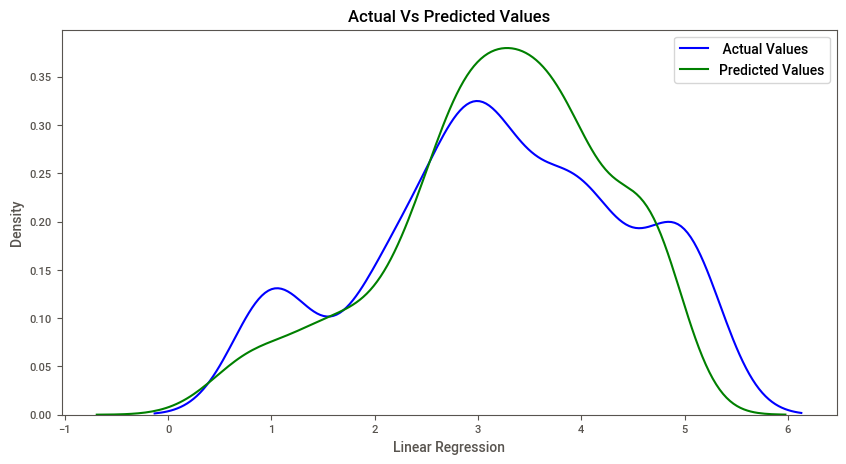

In [75]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('Linear Regression')
plt.legend()

In [76]:
#RMSE
rmse_LR = RMSE(y_test , y_pred)
rmse_LR

0.40364997827762433

In [77]:
# Creating Dataframe to comapre models
Result = pd.DataFrame({'Method':['Linear Model'],'RMSE':[rmse_LR]})

In [78]:
Result

,Method,RMSE
0,Linear Model,0.40365


# Ridge Regression

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
model_R = Ridge()
param = {'alpha':[0.01,0.1,1,10]}

In [80]:
#Defining Grid Search
Ridge_GS = GridSearchCV(model_R,param,scoring = 'neg_root_mean_squared_error',cv= KFold())

In [81]:
Ridge_GS.fit(x_train , y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [82]:
print(Ridge_GS.best_params_)

{'alpha': 1}


In [83]:
# Train the model with optimum parameter
model_Ridge = Ridge(alpha = 1)
model_Ridge.fit(x_train , y_train)

Ridge(alpha=1)

In [84]:
#Predicted Values
y_pred = model_Ridge.predict(x_test)
y_pred[:5]

array([2.53322082, 4.68552301, 3.15917574, 3.03562385, 4.55884687])

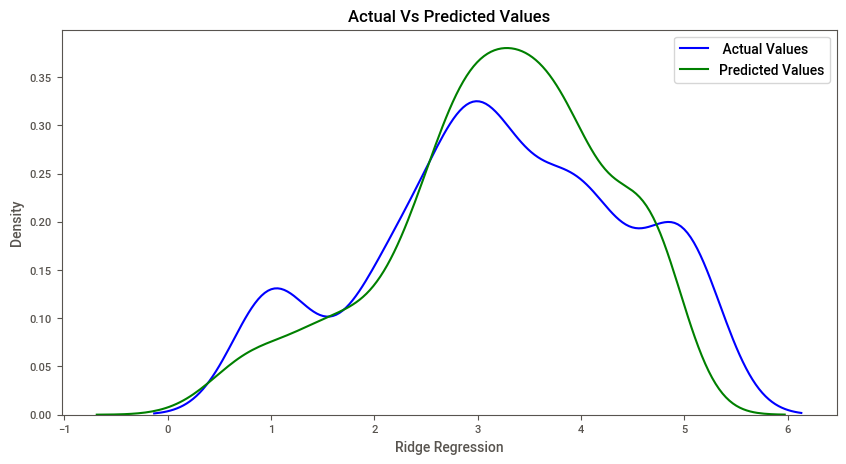

In [85]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('Ridge Regression')
plt.legend()

In [86]:
#RMSE
rmse_Ridge = RMSE(y_test , y_pred)
rmse_Ridge

0.4037769099722966

In [87]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'Ridge Regression','RMSE':rmse_Ridge},ignore_index=True)

In [88]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777


# Lasso Regression

In [89]:
# Hyperparameter Tuning using grid search CV and KFold
model_L = Lasso()
param = {'alpha':[0.01,0.1,1,10]}
Lasso_GS = GridSearchCV(model_L,param,scoring = 'neg_root_mean_squared_error',cv= KFold())

In [90]:
Lasso_GS.fit(x_train , y_train)
print(Lasso_GS.best_params_)

{'alpha': 0.01}


In [91]:
# Train the model with optimum parameter
model_Lasso = Lasso(alpha = 0.01)
model_Lasso.fit(x_train , y_train)

Lasso(alpha=0.01)

In [92]:
#Predicted Values
y_pred = model_Lasso.predict(x_test)
y_pred[:5]

array([2.51118744, 4.6637153 , 3.12017042, 3.00877227, 4.57513457])

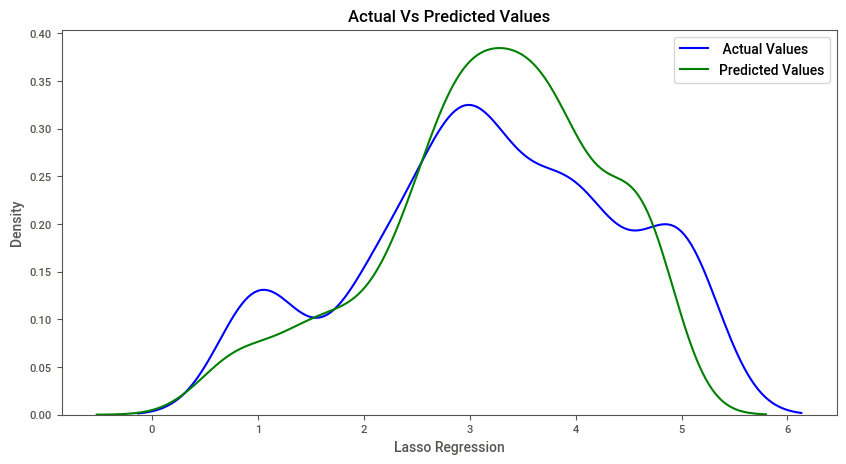

In [93]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('Lasso Regression')
plt.legend()

In [94]:
#RMSE
rmse_Lasso = RMSE(y_test , y_pred)
rmse_Lasso

0.41103079171681844

In [95]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'Lasso Regression','RMSE':rmse_Lasso},ignore_index=True)

In [96]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031


# Support Vector Machines

In [97]:
# Hyperparameter tuning using grid search and Kfold
model_S = SVR()
param = {'kernel': ('linear','rbf','poly')}
SVR_GS = GridSearchCV(model_S,param,scoring = 'neg_root_mean_squared_error',cv= KFold())
SVR_GS.fit(x_train , y_train )
print(SVR_GS.best_params_)

{'kernel': 'linear'}


In [98]:
#SVR with Linear Kernel with optimum values
model_SVR = SVR(kernel = 'linear')
model_SVR.fit(x_train , y_train)

SVR(kernel='linear')

In [99]:
#Predicted Values
y_pred = model_SVR.predict(x_test)
y_pred[:5]

array([2.52706063, 4.92986126, 3.06648578, 3.07117319, 4.8679699 ])

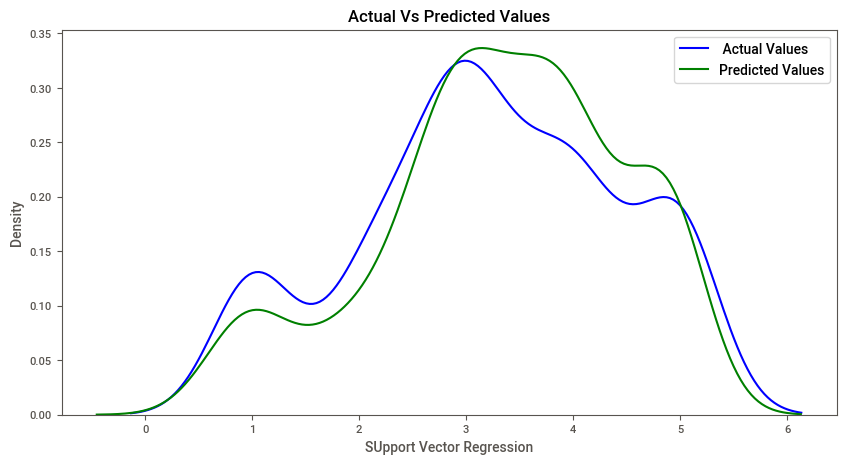

In [100]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('SUpport Vector Regression')
plt.legend()

In [101]:
#RMSE
rmse_SVR = RMSE(y_test , y_pred)
rmse_SVR

0.45048338046298947

In [102]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'Support Vector Regression','RMSE':rmse_SVR},ignore_index=True)

In [103]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031
3,Support Vector Regression,0.450483


# Decision Tree Regression

In [104]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train , y_train)

DecisionTreeRegressor()

In [105]:
#Predicted values
y_pred = model_DT.predict(x_test)
y_pred[:5]

array([2.22, 5.  , 2.  , 2.  , 5.  ])

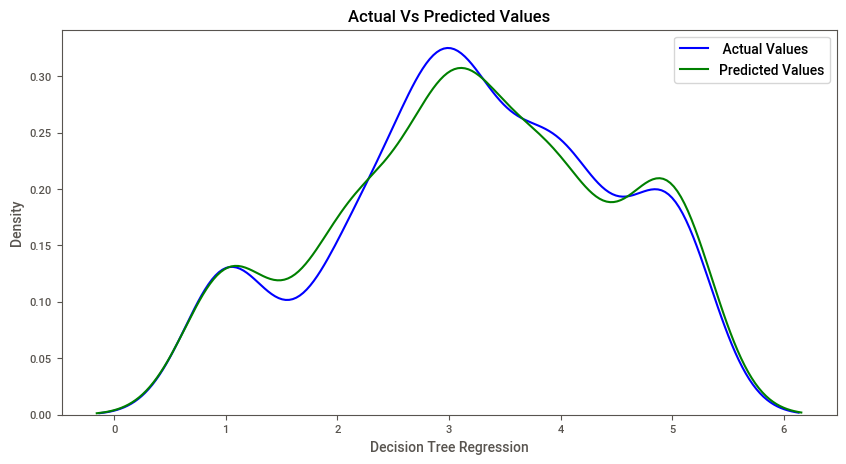

In [106]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('Decision Tree Regression')
plt.legend()

In [107]:
#RMSE
rmse_DT = RMSE(y_test , y_pred)
rmse_DT

0.5884228571428571

In [108]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'Decision Tree Regression','RMSE':rmse_DT},ignore_index=True)

In [109]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031
3,Support Vector Regression,0.450483
4,Decision Tree Regression,0.588423


# Random Forest

In [110]:
# Hyperparameter tuning using grid search and Kfold
model_RF = RandomForestRegressor()
param = {'n_estimators': [4,6,8,10]}
RF_GS = GridSearchCV(model_RF,param,scoring = 'neg_root_mean_squared_error',cv= KFold())
RF_GS.fit(x_train , y_train )
print(RF_GS.best_params_)

{'n_estimators': 10}


In [111]:
#Random Forest Regression Model
model_RF = RandomForestRegressor(n_estimators=10)
model_RF.fit(x_train , y_train)

RandomForestRegressor(n_estimators=10)

In [112]:
#Predicted Values
y_pred = model_RF.predict(x_test)
y_pred[:5]

array([2.517, 4.8  , 2.35 , 2.25 , 4.85 ])

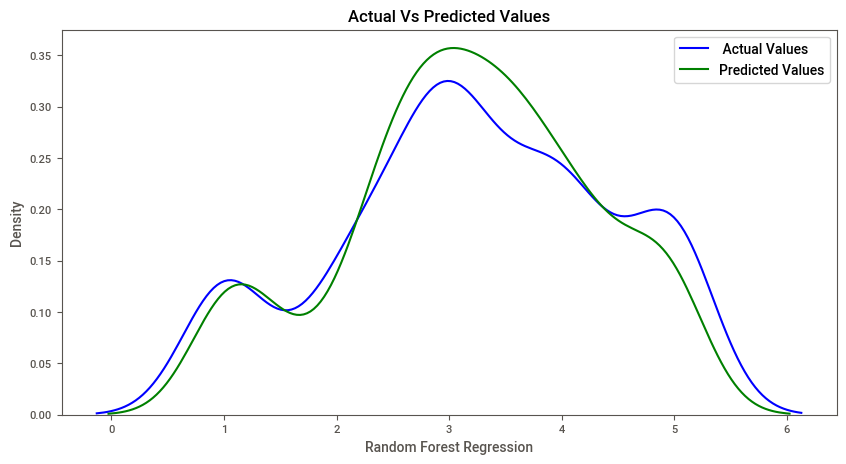

In [113]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('Random Forest Regression')
plt.legend()

In [114]:
#RMSE
rmse_RF = RMSE(y_test , y_pred)
rmse_RF

0.4114540628571428

In [115]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'Random Forest Regression','RMSE':rmse_RF},ignore_index=True)

In [116]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031
3,Support Vector Regression,0.450483
4,Decision Tree Regression,0.588423
5,Random Forest Regression,0.411454


# K-Nearest Neighbors Regression

In [117]:
# Hyperparameter tuning using grid search and Kfold
from sklearn.neighbors import KNeighborsRegressor
model_K = KNeighborsRegressor()
param = {'n_neighbors': [3,4,5]}
KNN_GS = GridSearchCV(model_K,param,scoring = 'neg_root_mean_squared_error',cv= KFold())
KNN_GS.fit(x_train , y_train )
print(KNN_GS.best_params_)

{'n_neighbors': 5}


In [118]:
#KNN Regressor
model_KNN =  KNeighborsRegressor(n_neighbors=5)
model_KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [119]:
#Predicted Values
y_pred = model_KNN.predict(x_test)
y_pred[:5]

array([2.548, 4.8  , 2.4  , 2.2  , 4.8  ])

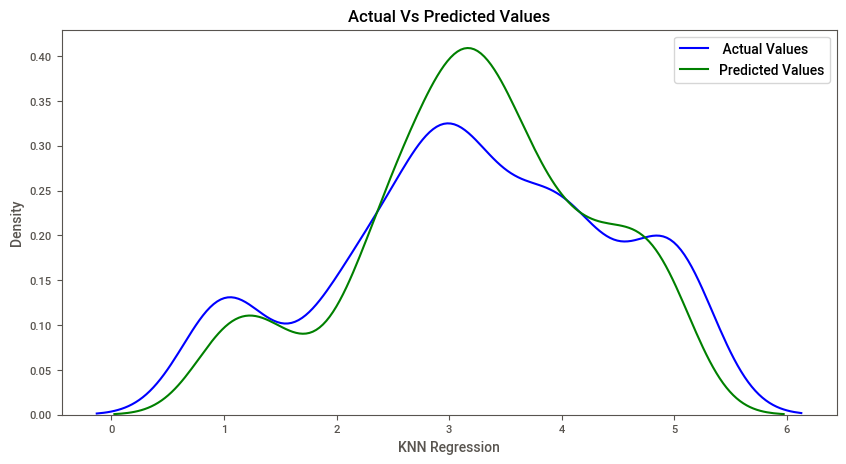

In [120]:
# Plotting Test and Predicted values
ax = sns.distplot(y_test , hist = False , color = "b" , label = " Actual Values")
sns.distplot(y_pred , hist = False , color = 'g',label = 'Predicted Values',ax = ax)
plt.title('Actual Vs Predicted Values')
plt.xlabel('KNN Regression')
plt.legend()

In [121]:
#RMSE
rmse_KNN = RMSE(y_test , y_pred)
rmse_KNN

0.5225266971428572

In [122]:
# Adding into Dataframe to comapre models
Result = Result.append({'Method':'KNN Regression','RMSE':rmse_KNN},ignore_index=True)

In [123]:
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031
3,Support Vector Regression,0.450483
4,Decision Tree Regression,0.588423
5,Random Forest Regression,0.411454
6,KNN Regression,0.522527


# Comparison of Models

In [124]:
Result.sort_values(['RMSE'],inplace = True, ignore_index = True)
Result

,Method,RMSE
0,Linear Model,0.403650
1,Ridge Regression,0.403777
2,Lasso Regression,0.411031
3,Random Forest Regression,0.411454
4,Support Vector Regression,0.450483
5,KNN Regression,0.522527
6,Decision Tree Regression,0.588423
